## Tutorial
### Follow along

Code for all the examples is located in your `PYTHONPATH/Lib/site-packages/eonr/examples` folder. With that said, you should be able to make use of `EONR` by following and executing the commands in this tutorial using either the sample data provided or substituting in your own data.

*You will find the following code included in the* `tutorial.py` *or* `tutorial.ipynb` *(for [Jupyter notebooks](https://jupyter.org/)) files in your* `PYTHONPATH/Lib/site-packages/eonr/examples` *folder - feel free to load that into your Python IDE to follow along.*

- - -
### Load modules
After [installation](installation.md), load `Pandas` and the `EONR` module in a Python interpreter:

In [1]:
import pandas as pd
from eonr import EONR

- - -
### Load the data
`EONR` uses Pandas dataframes to access and manipulate the experimental data.

In [2]:
df_data = pd.read_csv(r'data\minnesota_2012.csv')
df_data

,year,location,plot,trt,rep,time_n,rate_n_applied_kgha,yld_grain_dry_kgha,nup_total_kgha,soil_plus_fert_n_kgha
0,2012,Minnesota,101,8,1,Pre,235.3785,12410.916200,198.759898,284.69590
1,2012,Minnesota,102,3,1,Pre,67.2510,10627.946000,147.971755,116.56840
2,2012,Minnesota,103,1,1,Pre,0.0000,7428.081218,98.769392,38.10890
3,2012,Minnesota,104,2,1,Pre,33.6255,9202.953180,111.440210,71.73440
4,2012,Minnesota,105,4,2,Pre,100.8765,10841.127180,142.663887,154.67730
5,2012,Minnesota,106,7,2,Pre,201.7530,10646.649330,178.802092,255.55380
6,2012,Minnesota,107,6,2,Pre,168.1275,12367.436000,186.053531,201.75300
7,2012,Minnesota,108,5,2,Pre,134.5020,13366.361700,196.737290,168.12750
8,2012,Minnesota,201,7,1,Pre,201.7530,14232.053480,228.775204,251.07040
9,2012,Minnesota,202,5,1,Pre,134.5020,14384.824980,226.006218,183.81940


- - -
### Set column names *(pre-init)*
*The table containing the experimental data **must** have a minimum of two columns:*
* *Nitrogen fertilizer rate*
* *Grain yield*

`EONR` accepts custom column names. Just be sure to set them by either using `EONR.set_column_names()` or by passing them to `EONR.calculate_eonr()`. We will declare the names of the these two columns as they exist in the `Pandas` dataframe so they can be passed to `EONR` later:

In [3]:
col_n_app = 'rate_n_applied_kgha'
col_yld = 'yld_grain_dry_kgha'

Each row of data in our dataframe should correspond to a nitrogen rate treatment plot. It is common to have several other columns describing each treatment plot (e.g., year, location, replication, nitrogen timing, etc.). These aren't necessary, but `EONR` will try pull information from "year", "location", and "nitrogen timing" for labeling the plots that are generated (as you'll see towards the end of this tutorial).

- - -
### Set units
Although optional, it is good practice to declare units so we don't get confused:

In [4]:
unit_currency = '$'
unit_fert = 'kg'
unit_grain = 'kg'
unit_area = 'ha'

These unit variables are only used for plotting (titles and axes labels), and they are not actually used for any computations.

- - -
### Set economic conditions
`EONR` computes the _**Economic** Optimum Nitrogen Rate_ for any economic scenario that we define. All that is required is to declare the cost of the nitrogen fertilizer (per unit, as defined above) and the price of grain (also per unit). Note that the cost of nitrogen fertilizer can be set to zero, and the _**Agronomic** Optimum Nitrogen Rate_ will be computed.

In [5]:
cost_n_fert = 0.88  # in USD per kg nitrogen
price_grain = 0.157  # in USD per kg grain

- - -
### Initialize `EONR`
At this point, we can initialize an instance of `EONR`.

*Before doing so, we may want to set the base directory.* `EONR.base_dir` *is the default location for saving plots and data processed by* `EONR`*. If *`EONR.base_dir` *is not set, it will be set to be a folder named "eonr_advanced_tutorial" in the current working directory during the intitialization (to see your current working directory, type* `os.getcwd()`*). If you do not wish to use this as your current working directory, it can be passed to the* `EONR` *instance using the* `base_dir` *keyword.*

For demonstration purposes, we will set `EONR.base_dir` to what would be the default folder if nothing were passed to the `base_dir` keyword --> that is, we will choose a folder named "eonr_advanced_tutorial" in the current working directory (`EONR` will create the directory if it does not exist).

And finally, to create an instance of `EONR`, pass the appropriate variables to `EONR()`:

In [6]:
import os
base_dir = os.path.join(os.getcwd(), 'eonr_tutorial')

my_eonr = EONR(cost_n_fert=cost_n_fert,
               price_grain=price_grain,
               col_n_app=col_n_app,
               col_yld=col_yld,
               unit_currency=unit_currency,
               unit_grain=unit_grain,
               unit_fert=unit_fert,
               unit_area=unit_area,
               base_dir=base_dir)

- - -
### Calculate the EONR
With `my_eonr` initialized as an instance of `EONR`, we can now calculate the economic optimum nitrogen rate by calling the `calculate_eonr()` method and passing the dataframe with the loaded data:

In [7]:
my_eonr.calculate_eonr(df_data)


Computing EONR for Minnesota 2012 Pre
Cost of N fertilizer: $0.88 per kg
Price grain: $0.16 per kg
Economic optimum N rate (EONR): 162.3 kg per ha [130.5, 207.8] (90.0% confidence)
Maximum return to N (MRTN): $767.93 per ha


It may take several seconds to run - this is because it computes the profile-likelihood and bootstrap confidence intervals by default (and as described in the [Background section](#background) this is the real novelty of `EONR` package).

And that's it! The economic optimum for this dataset and economic scenario was **162 kg nitrogen per ha** (with 90% confidence bounds at **131** and **208 kg per ha**) and resulted in a maximum net return of nearly **$770 per ha**.

- - - 
### Plotting the EONR
This is great, but of course it'd be useful to see our data and results plotted. Do this by calling the ```plot_eonr()``` module and *(optionally)* passing the minimum/maximum values for each axis:

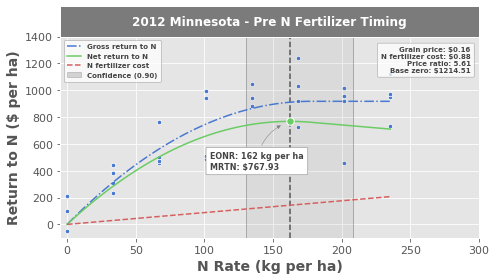

In [8]:
my_eonr.plot_eonr(x_min=-5, x_max=300, y_min=-100, y_max=1400)

* The blue points are _**experimental data**_ (yield value in \\$ per ha as a function of nitrogen rate)
* The blue line is the best-fit quadratic-plateau model representing _**gross return to nitrogen**_
* The red line is the _**cost of nitrogen fertilizer**_
* The green line is the difference between the two and represents the _**net return to nitrogen**_
* The green point is the _**Economic Optimum Nitrogen Rate (EONR)**_
* The transparent grey box surrounding the EONR/MRTN (green point) illustrates the _**90\% confidence intervals**_

The EONR is the point on the x-axis where the net return curve (green) reaches the maximum return. The return to nitrogen at the EONR is the **Maximum Return to Nitrogen (MRTN)**, indicating the profit that is earned at the economic optimum nitrogen rate.

*Notice the economic scenario (i.e., grain price, nitrogen fertilizer cost, etc.) and the "Base zero" values in the upper right corner describing the assumptions of EONR calculatioon. "Base zero" refers to the initial y-intercept of the gross return model (this setting can be turned on/off by setting* `EONR.base_zero` *to* `True` or `False`. See the *[Advanced tutorial](advanced_tutorial.html#Turn-base_zero-off)* and the [API](my_eonr.html#module-eonr.eonr) for more information.

- - -
### Accesing complete results
All results (e.g., EONR, MRTN, $\text{r}^2$ and root mean squared errors from best-fit models, confidence intervals, etc.) are stored in the `EONR.df_results` dataframe:

In [9]:
my_eonr.df_results

,price_grain,cost_n_fert,cost_n_social,price_ratio,location,year,time_n,base_zero,eonr,theta2_error,...,mrtn,grtn_r2_adj,grtn_rmse,grtn_max_y,grtn_crit_x,grtn_y_int,scn_lin_r2,scn_lin_rmse,scn_exp_r2,scn_exp_rmse
0,0.157,0.88,0,5.605,Minnesota,2012,Pre,1214.508882,162.339607,-0.000209,...,767.928842,0.728926,181.225993,917.431894,177.440056,1214.508882,None,None,None,None


- - -
### Visualizing all confidence intervals
By default, the confidence intervals (CIs) are calculated at many alpha levels. Noting that $\text{CI} = 1-\alpha$, let's plot the _**Wald**_ CIs, _**profile-likelihood**_ CIs, and _**bootstrap**_ CIs for a range of $\alpha$ values.

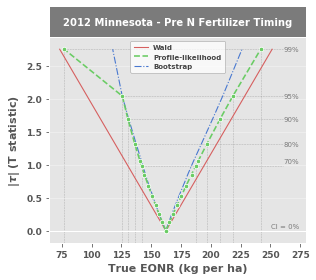

In [10]:
my_eonr.plot_tau()

This plot shows the lower and upper confidence intervals of the *True EONR* (*True EONR* refers to the actual EONR value, which is not actually known due to uncertainty in the dataset). At 0\% confidence, the *True EONR* is the *maximum likelihood* value, but as we increase the confidence level from 67\%, 80\%, 90\%, 95\%, and 99\%, the statistical range of the *True EONR* widens.

In general, the profile-likelihood CIs are considered the most accurate of the three methods because they reflect the actual, often asymmetric, uncertainty in a parameter estimate [Cook & Weisberg, 1990](https://www.tandfonline.com/doi/abs/10.1080/01621459.1990.10476233).

- - -
### Accessing complete CI results
All data relating to the calculation of the CIs are saved in the `EONR.df_ci` dataframe:

In [11]:
my_eonr.df_ci

,run_n,location,year,time_n,price_grain,cost_n_fert,cost_n_social,price_ratio,f_stat,t_stat,level,wald_l,wald_u,pl_l,pl_u,opt_method_l,opt_method_u,boot_l,boot_u
0,1,Minnesota,2012,Pre,0.157,0.88,0,5.605,0.000000,0.000000,0.000,162.339607,162.339607,162.339607,162.339607,N/A,N/A,162.339607,162.339607
1,1,Minnesota,2012,Pre,0.157,0.88,0,5.605,0.016070,0.126767,0.100,158.245357,166.433857,159.432330,165.322945,Nelder-Mead,Nelder-Mead,159.167742,164.619378
2,1,Minnesota,2012,Pre,0.157,0.88,0,5.605,0.065374,0.255684,0.200,154.081654,170.597561,156.557527,168.433047,Nelder-Mead,Nelder-Mead,156.628777,167.334387
3,1,Minnesota,2012,Pre,0.157,0.88,0,5.605,0.151446,0.389161,0.300,149.770661,174.908553,153.670533,171.730622,Nelder-Mead,Nelder-Mead,153.960263,170.230379
4,1,Minnesota,2012,Pre,0.157,0.88,0,5.605,0.281127,0.530214,0.400,145.214985,179.464230,150.721498,175.297946,Nelder-Mead,Nelder-Mead,151.331260,173.309881
5,1,Minnesota,2012,Pre,0.157,0.88,0,5.605,0.466549,0.683044,0.500,140.278968,184.400246,147.647487,179.255219,Nelder-Mead,Nelder-Mead,148.245215,176.835225
6,1,Minnesota,2012,Pre,0.157,0.88,0,5.605,0.729644,0.854192,0.600,134.751304,189.927910,144.357370,183.796414,Nelder-Mead,Nelder-Mead,145.221720,180.657189
7,1,Minnesota,2012,Pre,0.157,0.88,0,5.605,0.969292,0.984526,0.667,130.541823,194.137392,141.960807,187.330204,Nelder-Mead,Nelder-Mead,143.058749,183.704446
8,1,Minnesota,2012,Pre,0.157,0.88,0,5.605,1.113663,1.055302,0.700,128.255937,196.423278,140.698785,189.275938,Nelder-Mead,Nelder-Mead,141.940779,185.417398
9,1,Minnesota,2012,Pre,0.157,0.88,0,5.605,1.719858,1.311434,0.800,119.983522,204.695693,136.361806,196.472910,Nelder-Mead,Nelder-Mead,137.553235,191.885290


- - - 
### Adjusting the economic scenario
These results were calculated for a specific economic scenario, but the cost of fertilizer and price of grain can be adjusted to run `EONR` for another economic scenario. Just adjust the economic scenario by passing any of:

* `cost_n_fert`
* `price_grain`
* `cost_n_social`

to `EONR.update_econ()`:

In [12]:
cost_n_fert = 1.32  # adjusted from $0.88 per kg nitrogen
my_eonr.update_econ(cost_n_fert=cost_n_fert)

- - -
### Environmental observations
You'll notice above that we can pass the `cost_n_social` variable to `EONR.update_econ()`. This is becuase `EONR` will calculate the  _**Socially Optimum Nitrogen Rate (SONR)**_ if certain environmental data are available. For more information about the _**SONR**_, refer to the [Background chapter](background.html#The-social-cost-of-nitrogen).

In the same way that `cost_n_fert` was adjusted in the previous code, `cost_n_social` will be set (for the first time):

In [13]:
cost_n_social = 1.10 # in USD per kg nitrogen
my_eonr.update_econ(cost_n_social=cost_n_social)

- - -
### Set column names *(post-init)*
You may have noticed that [the loaded data](quick_start.html#Load-the-data) for this tutorial contains columns for nitrogen uptake ("nup_total_kgha") and available nitrogen ("soil_plus_fert_n_kgha"). This data can be used to calculate the _**SONR**_ as long as the column names are correctly set. 

The column names were set for nitrogen fertilizer rate (`col_n_app`) and grain yield (`col_yld`) during the initialization of `EONR`, but they haven't been set for the nitrogen uptake or available nitrogen columns. This can be done (even after initilization of `EONR`) using `EONR.set_column_names()`:

In [14]:
col_crop_nup = 'nup_total_kgha'
col_n_avail = 'soil_plus_fert_n_kgha'

my_eonr.set_column_names(col_crop_nup=col_crop_nup,
                         col_n_avail=col_n_avail)

`EONR` simply subtracts *end of season total nitrogen uptake* from *available nitrogen* to get _**net crop nitrogen use**_, which is subsequently used to calculate the _**SONR**_.

- - -
### Run `EONR` for the socially optimum rate
Then simply run `EONR.calculate_eonr()` again to calculate the _**SONR**_ for the updated economic scenario:

In [15]:
my_eonr.calculate_eonr(df_data)


Computing SONR for Minnesota 2012 Pre
Cost of N fertilizer: $1.32 per kg
Price grain: $0.16 per kg
Social cost of N: $1.10 per kg
Socially optimum N rate (SONR): 146.5 kg per ha [120.3, 181.1] (90.0% confidence)
Maximum return to N (MRTN): $727.43 per ha


The new results are appended to the `EONR.df_results` dataframe:

In [16]:
my_eonr.df_results

,price_grain,cost_n_fert,cost_n_social,price_ratio,location,year,time_n,base_zero,eonr,theta2_error,...,mrtn,grtn_r2_adj,grtn_rmse,grtn_max_y,grtn_crit_x,grtn_y_int,scn_lin_r2,scn_lin_rmse,scn_exp_r2,scn_exp_rmse
0,0.157,0.88,0,5.605000,Minnesota,2012,Pre,1214.508882,162.339607,-0.000209,...,767.928842,0.728926,181.225993,917.431894,177.440056,1214.508882,None,None,None,None
1,0.157,1.32,1.1,15.414013,Minnesota,2012,Pre,1214.508882,146.480139,-0.000117,...,727.427961,0.728926,181.225993,917.431894,177.440056,1214.508882,0.777106,139.314,0.836099,21.1184


`EONR.plot_eonr()` and `EONR.plot_tau()` can be called again to plot the new results:

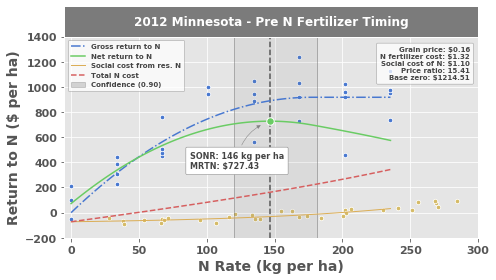

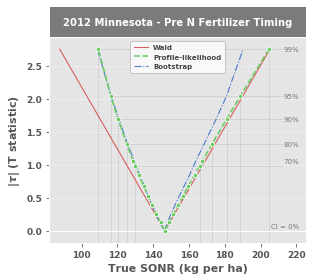

In [17]:
my_eonr.plot_eonr(x_min=-5, x_max=300, y_min=-200, y_max=1400)
my_eonr.plot_tau()

Notice the added data in the nitrogen response plot:
* The gold points represent _**net crop nitrogen use**_ (expressed as a \\$ amount based on the value set for `cost_n_social`)
* The gold line is the best-fit exponential model representing _**net crop nitrogen use**_ (`EONR` fits both a linear and exponential model for this, then uses whichever has a higher $\text{r}^2$)

- - -
### Saving the data
The results generated by `EONR` can be saved to the `EONR.base_dir` using the `Pandas` `df.to_csv()` function. A folder will be created in the base_dir whose name is determined by the _**current economic scenario**_ of `my_eonr` (in this case "social_154_1100", corresponding to `cost_n_social > 0`, `price_ratio = 15.4`, and `cost_n_social = 1.10`, respectively):

In [18]:
print(my_eonr.base_dir)

my_eonr.df_results.to_csv(os.path.join(os.path.split(my_eonr.base_dir)[0], 'tutorial_results.csv'), index=False)
my_eonr.df_ci.to_csv(os.path.join(os.path.split(my_eonr.base_dir)[0], 'tutorial_ci.csv'), index=False)

F:\nigo0024\Documents\GitHub\eonr\eonr\examples\eonr_advanced_tutorial\social_154_1100


Upon generating figures using `EONR.plot_eonr()` or `EONR.plot_tau()`, the `matplotlib` figures are stored to the `EONR` class. They can be saved to file by using `EONR.plot_save()`: 

In [19]:
fname_eonr_plot = 'eonr_mn2012_pre.png'
fname_tau_plot = 'tau_mn2012_pre.png'

my_eonr.plot_save(fname=fname_eonr_plot, fig=my_eonr.fig_eonr)
my_eonr.plot_save(fname=fname_tau_plot, fig=my_eonr.fig_tau)